This Tutorial is from the Medium Post, [How safe are the streets of Santiago?](https://towardsdatascience.com/how-safe-are-the-streets-of-santiago-e01ba483ce4b)

The package, Geopandas can be easily installed using:
```bash
conda install geopandas
```

A great start to learn GeoPandas is to follow the article from Benjamin Colley: [Let’s make a map! Using Geopandas, Pandas and Matplotlib to make a Choropleth map](https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
# set the filepath and load in a shapefile
fp = "statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


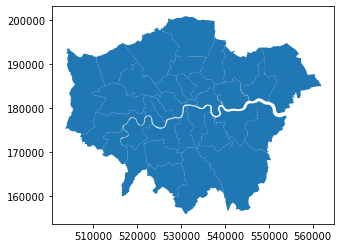

In [2]:
map_df.plot()

In [3]:
df = pd.read_csv("./statistical-gis-boundaries-london/london-borough-profiles.csv", header=0, encoding = "ISO-8859-1", engine='python')
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [4]:
df.shape

(38, 84)

In [5]:
# get the important data slices
# df = df[['borough',
#          'Happiness_score_2011–14_(out_of_10)',
#          'Anxiety_score_2011–14_(out_of_10)',
#          'Population_density_(per_hectare)_2017',
#          'Mortality_rate_from_causes_considered_preventable_2012/14']]
df_new = df[["Area_name",
             "Happiness_score_2011-14_(out_of_10)",
             "Anxiety_score_2011-14_(out_of_10)",
            "Population_density_(per_hectare)_2017",
            "Mortality_rate_from_causes_considered_preventable_2012/14"]]

In [6]:
# rename columns to something better
data_for_map = df_new.rename(
    index=str,
    columns={
            "Area_name": "borough",
            "Happiness_score_2011-14_(out_of_10)": "happiness",
             "Anxiety_score_2011-14_(out_of_10)": "anxiety",
            "Population_density_(per_hectare)_2017": "pop_density_per_hectare",
            "Mortality_rate_from_causes_considered_preventable_2012/14": "mortality"
    })
data_for_map.head()

,borough,happiness,anxiety,pop_density_per_hectare,mortality
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


In [7]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("NAME").join(data_for_map.set_index("borough"))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,pop_density_per_hectare,mortality
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",7.4,3.3,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",7.2,3.3,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",7.4,3.3,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",7.4,3.4,49,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",7.3,3.6,63.3,164


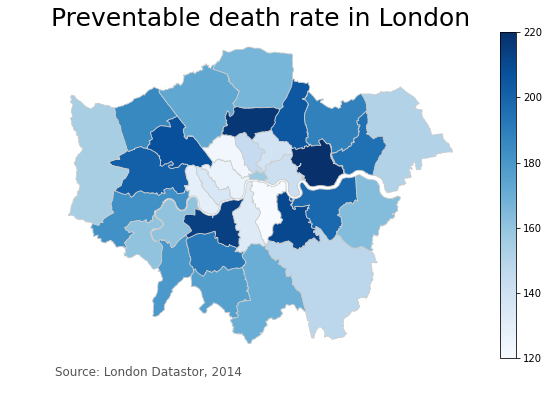

In [15]:
# set a variable that will call whatever column we want to visualize on the map
variable = "pop_density_per_hectare"

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8")

# customize the map
ax.axis("off")

# add title 
ax.set_title("Preventable death rate in London", fontdict={"fontsize":"25", "fontweight":"3"})

# create an annotation for the data source
ax.annotate("Source: London Datastore, 2014", xy=(0.1, 0.08), xycoords="figure fraction",
            horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")

# create a colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

# save the figure as png
# fig.savefig("map_export.png", dpi=300)

In [8]:
jp_fp = "gm-jpn-all_u_2_2/polbnda_jpn.shp"
jp_map_df = gpd.read_file(jp_fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
jp_map_df.head()

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry
0,FA001,JPN,Hokkai Do,Sapporo Shi,1930496,2014,01100,UNK,JPN,"POLYGON ((141.44980 43.16333, 141.44769 43.157..."
1,FA001,JPN,Hokkai Do,Hakodate Shi,274485,2014,01202,UNK,JPN,"POLYGON ((140.86501 42.01013, 140.86800 42.008..."
2,FA001,JPN,Hokkai Do,Otaru Shi,127224,2014,01203,UNK,JPN,"POLYGON ((141.24820 43.15973, 141.24680 43.158..."
3,FA001,JPN,Hokkai Do,Asahikawa Shi,349057,2014,01204,UNK,JPN,"POLYGON ((142.43280 43.94814, 142.43790 43.944..."
4,FA001,JPN,Hokkai Do,Muroran Shi,91276,2014,01205,UNK,JPN,"POLYGON ((140.99080 42.43800, 140.99680 42.436..."


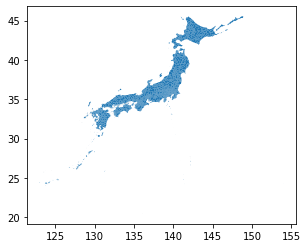

In [32]:
# Plot of Japan
jp_map_df.plot()

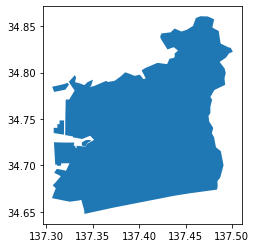

In [33]:
# Plot of Toyohashi
jp_map_df[jp_map_df["laa"]=="Toyohashi Shi"].plot()

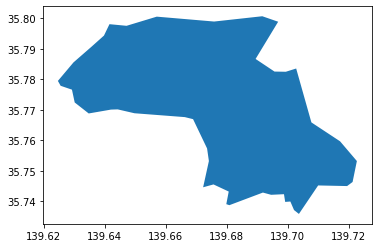

In [38]:
# Plot of Toyohashi
jp_map_df[jp_map_df["laa"]=="Itabashi Ku"].plot()

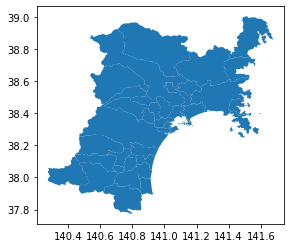

In [37]:
# Plot of Tokyo
jp_map_df[jp_map_df["nam"]=="Miyagi Ken"].plot()

In [35]:
jp_map_df["nam"]

0       Hokkai Do
1       Hokkai Do
2       Hokkai Do
3       Hokkai Do
4       Hokkai Do
          ...    
2909     Tokyo To
2910     Tokyo To
2911     Tokyo To
2912     Tokyo To
2913    Aichi Ken
Name: nam, Length: 2914, dtype: object